 Week 4 files for regression being taught 

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import math 

from sklearn import datasets
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [5]:
dia_x , dia_y = datasets.load_diabetes(return_X_y=True,as_frame=True)

print(dia_x.shape,dia_y.shape)
print(f" 1st set:{dia_x.head()} \n ---------")
print(f" 2nd set:{dia_y.head()} \n ---------")

(442, 10) (442,)
 1st set:        age       sex       bmi  ...        s4        s5        s6
0  0.038076  0.050680  0.061696  ... -0.002592  0.019907 -0.017646
1 -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068332 -0.092204
2  0.085299  0.050680  0.044451  ... -0.002592  0.002861 -0.025930
3 -0.089063 -0.044642 -0.011595  ...  0.034309  0.022688 -0.009362
4  0.005383 -0.044642 -0.036385  ... -0.002592 -0.031988 -0.046641

[5 rows x 10 columns] 
 ---------
 2nd set:0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64 
 ---------


In [6]:
dia_x.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [7]:
# checking basic informations 

dia_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [8]:
dia_y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [10]:
dia_x.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [11]:
# checking if the data is mean centered or not 

mean_values = dia_x.describe().loc["mean"]

mean_values


age   -2.511817e-19
sex    1.230790e-17
bmi   -2.245564e-16
bp    -4.797570e-17
s1    -1.381499e-17
s2     3.918434e-17
s3    -5.777179e-18
s4    -9.042540e-18
s5     9.293722e-17
s6     1.130318e-17
Name: mean, dtype: float64

In [15]:
selection = dia_x.loc[:2]

selection

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


In [16]:
type(selection)

pandas.core.frame.DataFrame

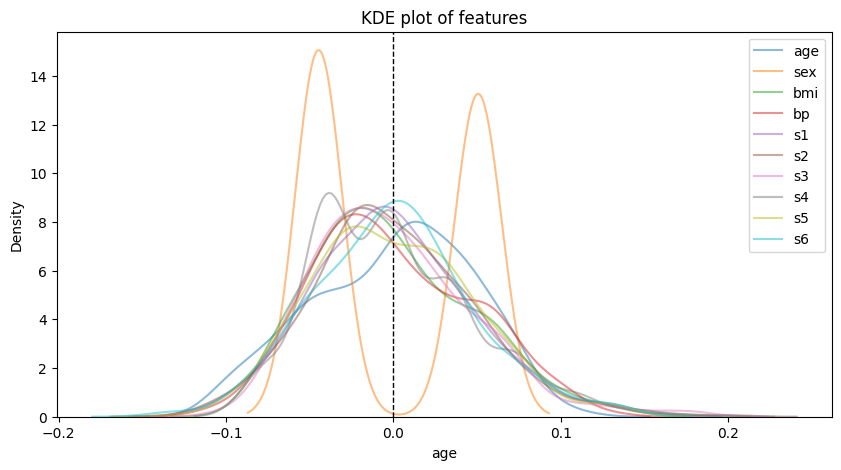

In [21]:
# to see if data is scaled or not we can use KDE plots kernel density estimation 

plt.figure(figsize=(10,5))

for col in dia_x.columns:
    sns.kdeplot(dia_x[col],label=col, alpha=0.5)  # alpha is the transparency of each column

plt.axvline(x=0,color='black',linestyle="--",linewidth=1)

plt.legend()

plt.title("KDE plot of features")

plt.show()

<!-- # The active selection is a block of Python code that uses the `matplotlib` and `seaborn` libraries to create a Kernel Density Estimate (KDE) plot for the features in a DataFrame named `dia_x`. This type of plot is useful for visualizing the distribution of continuous data.

The first line, `plt.figure(figsize=(10,5))`, initializes a new figure with a specified size of 10 inches by 5 inches. This sets up the canvas on which the plots will be drawn.

The `for` loop iterates over each column in the `dia_x` DataFrame. For each column, the `sns.kdeplot` function from the `seaborn` library is called to generate a KDE plot. The `dia_x[col]` argument specifies the data for the current column, and the `label=col` argument sets the label for the plot legend. The `alpha=0.5` argument adjusts the transparency of the plot lines, making it easier to distinguish overlapping distributions.

The line `plt.axvline(x=0,color='black',linestyle="--",linewidth=1)` adds a vertical dashed line at `x=0` to the plot. This line serves as a reference point, helping to visually separate the positive and negative values in the distributions.

The `plt.legend()` function adds a legend to the plot, which displays the labels for each KDE plot corresponding to the columns in the DataFrame. This helps in identifying which line represents which feature.

The `plt.title("KDE plot of features")` function sets the title of the plot to "KDE plot of features," providing context for what the plot represents.

Finally, `plt.show()` renders the plot and displays it. This function call is necessary to visualize the plot when running the code in a script or interactive environment like Jupyter Notebook.

Overall, this code block creates a comprehensive KDE plot that visualizes the distributions of multiple features from the `dia_x` DataFrame, making it easier to compare their distributions and identify patterns or anomalies. -->

# here the sex of male and female is not standardized 

In [ ]:
# Create two separate scalers for demonstration
scaler1 = StandardScaler()
scaler2 = StandardScaler()

# Using fit() only
scaler1.fit(dia_x)
print("Using fit() only:")
print("Mean values stored in scaler:", scaler1.mean_[:3])  # showing first 3 means
print("No transformed data returned\n")

# Using fit_transform()
transformed_data = scaler2.fit_transform(dia_x)
print("Using fit_transform():")
print("Mean values stored in scaler:", scaler2.mean_[:3])
print("Transformed data shape:", transformed_data.shape)
print("First 3 values of transformed data:\n", transformed_data[:3, :3])

# Key differences:
# 1. fit() only learns the parameters (mean, std) but doesn't transform the data
# 2. fit_transform() learns the parameters AND returns the transformed data in one step

In [ ]:
# standardizing data 

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X = sc.fit_transform(x)


In [22]:
# taking one of the metrics 

x = dia_x['bmi'].values
y= dia_y.values

x.shape,y.shape

((442,), (442,))

In [ ]:
# RESHAPE CONVERTS to 2D array for linear regression \

x = dia_x['bmi'].values.reshape(-1,1) # indepenendent variable , converts into 2d variable
y = dia_y.values.reshape(-1,1) # dependent variable


x.shape,y.shape


((442, 1), (442, 1))